# Student performance study

#### Anastasia-Daria Marc

Dataset source from https://www.kaggle.com/datasets/larsen0966/student-performance-data-set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [96]:
df = pd.read_csv("student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [97]:
df.shape

(395, 33)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [103]:
data = df.copy()
data['final_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

In [104]:
data.final_grade.max()

19.333333333333332

In [105]:
data.final_grade.min()

1.3333333333333333

We will assume that the maximum possible grade is 20 and the minimum is 10. So we consider students that have passed the exam have a grade >= 10.

In [107]:
data['exam_passed'] = 0

for grade_idx in data['final_grade'].index:
    if data['final_grade'][grade_idx] >= 10:
        data['exam_passed'][grade_idx] = 1
#     else:
#         df['exam_passed'][grade_idx] = 0

<ipython-input-107-4ff1890ff541>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['exam_passed'][grade_idx] = 1


In [108]:
data['exam_passed']

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    1
392    0
393    1
394    0
Name: exam_passed, Length: 395, dtype: int64

The dataset doesn't provide information about many variables, so we will remove some of the columns.

In [109]:
data.drop(['address', 'Pstatus','reason',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc', 'guardian'], axis =1, inplace=True)

## Exploratory data analysis

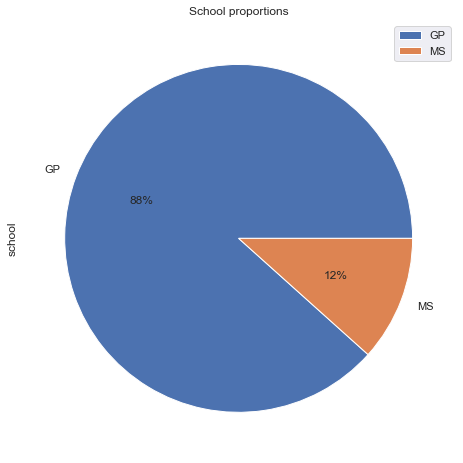

In [110]:
plt.figure(figsize=(10,8))
data.school.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('School proportions')
plt.legend()

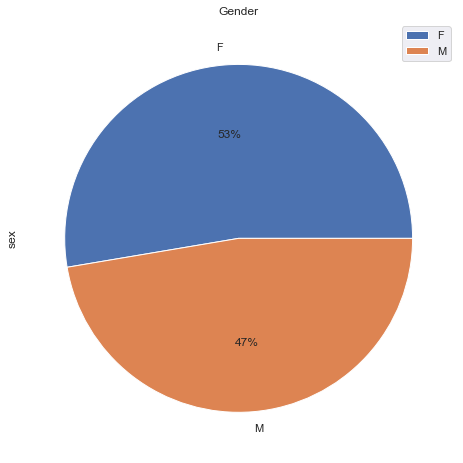

In [111]:
plt.figure(figsize=(10,8))
data.sex.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Gender')
plt.legend()

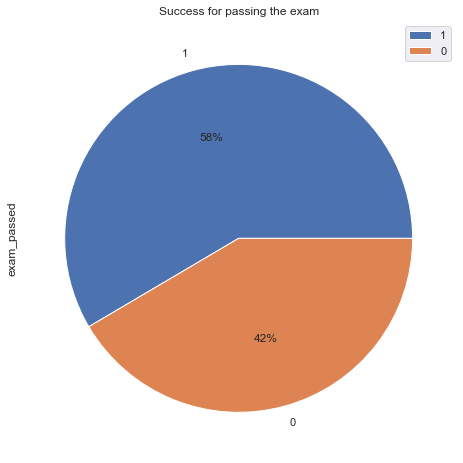

In [112]:
plt.figure(figsize=(10,8))
data.exam_passed.value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Success for passing the exam')
plt.legend()

Text(0.5, 1.0, 'Age Distribution')

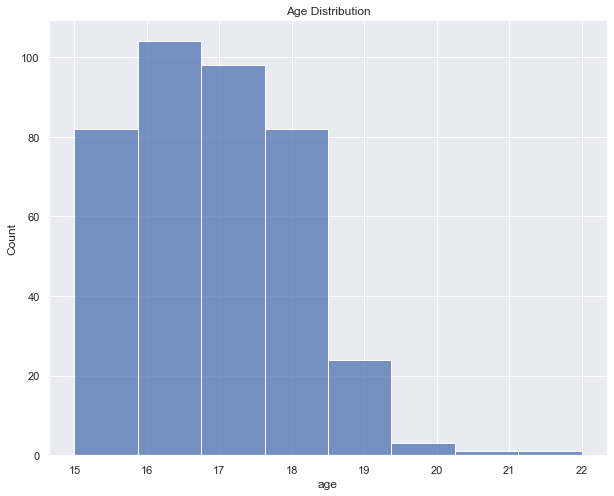

In [113]:
plt.figure(figsize=(10,8))
sns.histplot(data = data, x='age', bins=8)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Family size')

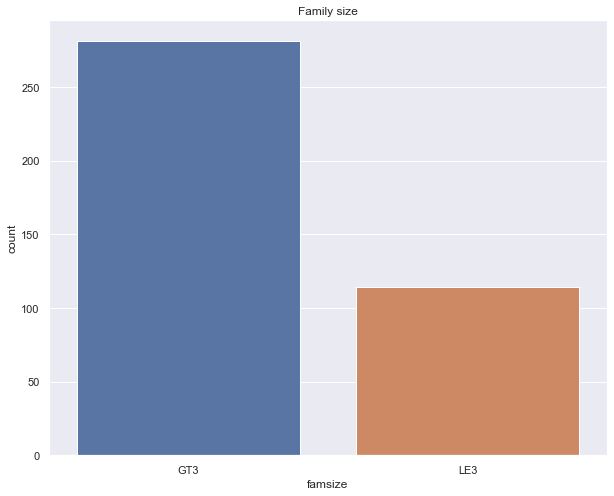

In [114]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x='famsize', order = df.famsize.value_counts().index)
plt.title('Family size')

Text(0.5, 1.0, "Father's Education")

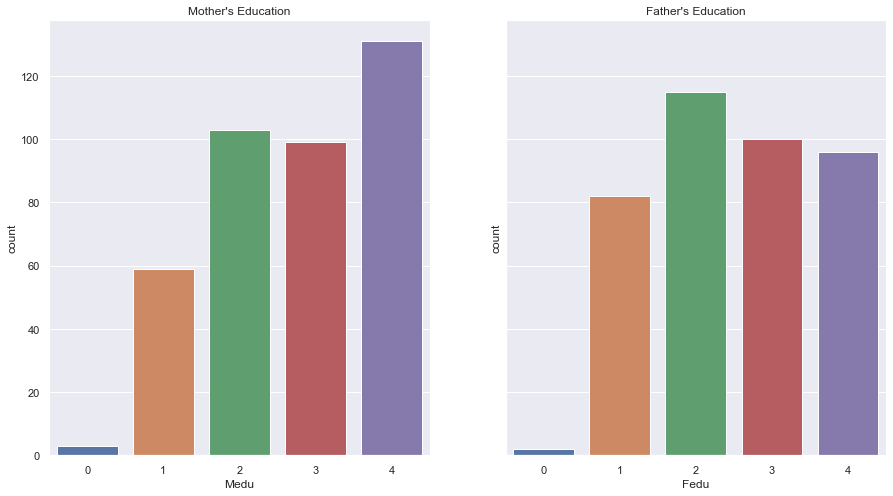

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# mother education
sns.countplot(ax=axes[0], data = data, x='Medu')
axes[0].set_title('Mother\'s Education')

# father education
sns.countplot(ax=axes[1], data = data, x='Fedu')
axes[1].set_title('Father\'s Education')

Text(0.5, 1.0, "Father's Job")

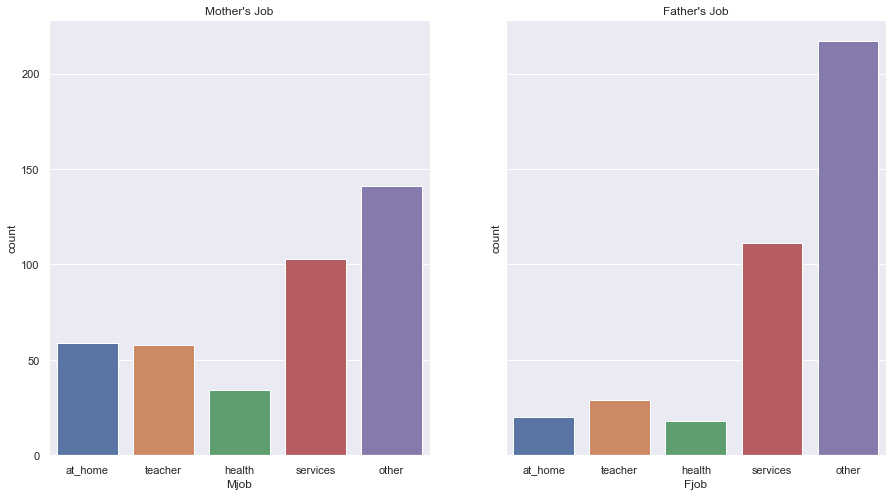

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = ['at_home','teacher','health','services','other']

# Mother's job
sns.countplot(ax=axes[0], data = data, x='Mjob', order=order2)
axes[0].set_title('Mother\'s Job')

# Father's job
sns.countplot(ax=axes[1], data = data, x='Fjob', order=order2)
axes[1].set_title('Father\'s Job')

Text(0.5, 1.0, 'Study time')

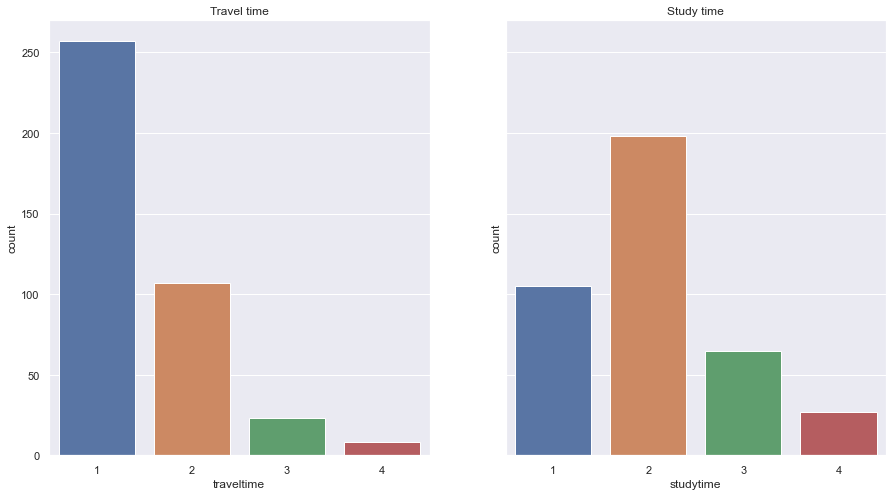

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = [1,2,3,4]

# Mjob
sns.countplot(ax=axes[0], data = data, x='traveltime', order=order2)
axes[0].set_title('Travel time')

# Fjob
sns.countplot(ax=axes[1], data = data, x='studytime', order=order2)
axes[1].set_title('Study time')

Text(0.5, 1.0, 'Health')

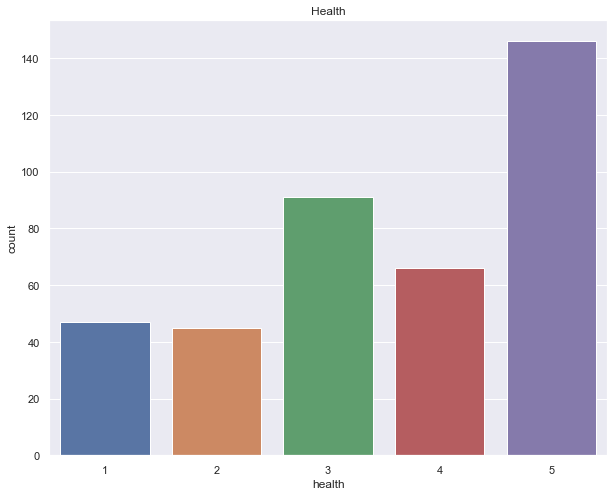

In [118]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x='health')
plt.title('Health')

Text(0.5, 1.0, 'Absences Distributiion')

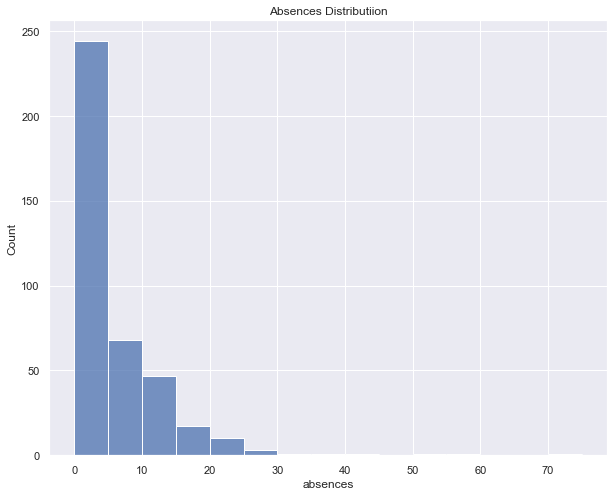

In [119]:
plt.figure(figsize=(10,8))
sns.histplot(data = data, x='absences', bins=15)
plt.title('Absences Distributiion')

Text(0.5, 1.0, 'Final grade Distribution')

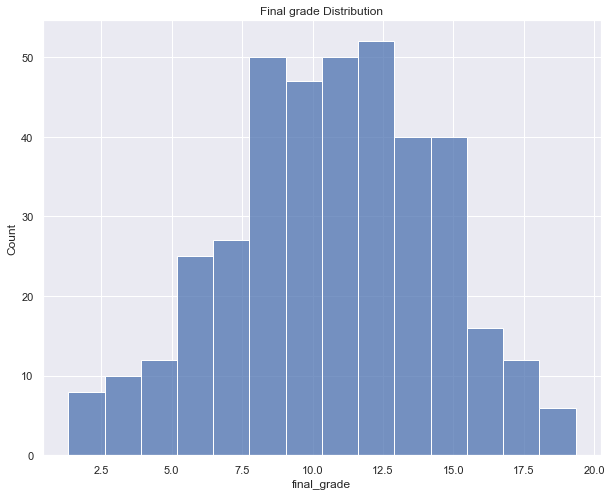

In [120]:
plt.figure(figsize=(10,8))
sns.histplot(data = data, x='final_grade')
plt.title('Final grade Distribution')

Text(0.5, 1.0, 'Correlation heatmap')

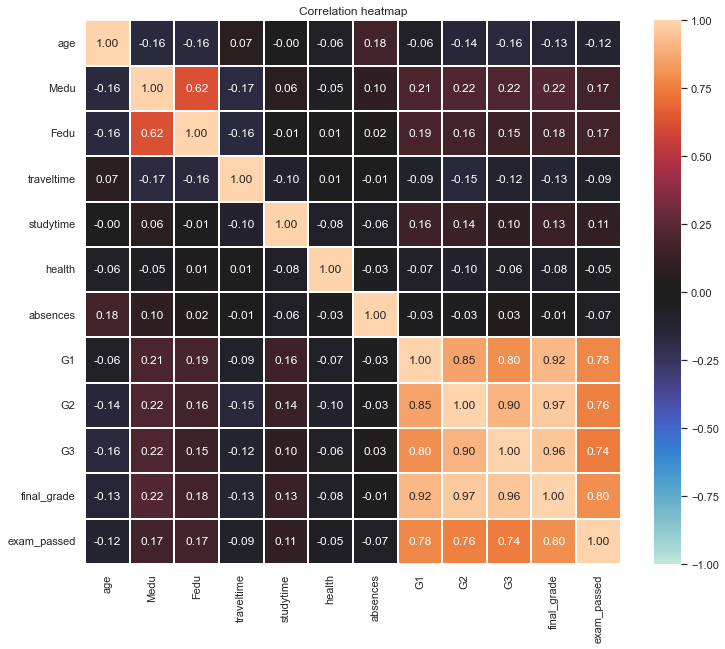

In [121]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), center=0, linewidths=1, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation heatmap')

In [122]:
data.to_csv('student_performance_data.csv')

## Preparation of dataset for attribute exploration

In [147]:
data_exp = df.copy()
data_exp['final_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

data_exp['exam_passed'] = 0

for grade_idx in data_exp['final_grade'].index:
    if data_exp['final_grade'][grade_idx] >= 10:
        data_exp['exam_passed'][grade_idx] = 1

<ipython-input-147-4bda43441b07>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exp['exam_passed'][grade_idx] = 1


In [148]:
data_exp.drop(['address', 'Pstatus','reason', 'famsize',
       'failures', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout','Dalc',
       'Walc', 'guardian', 'school', 'age', 'Mjob', 'Fjob', 'absences', 'G1', 'G2', 'G3', 'sex', 'health', 'traveltime', 'studytime'], axis =1, inplace=True)

In [149]:
data_exp.head()

,Medu,Fedu,schoolsup,famsup,paid,final_grade,exam_passed
0,4,4,yes,no,no,5.666667,0
1,1,1,no,yes,no,5.333333,0
2,1,1,yes,no,yes,8.333333,0
3,4,2,no,yes,yes,14.666667,1
4,3,3,no,yes,yes,8.666667,0


In [150]:
data_exp['parents_edu'] = data_exp['Medu'] + data_exp['Fedu']

Define parents education level as:
higher education - 7 or 8
secondary education - 4, 5, 6
low or no education - 0, 1, 2, 3

In [151]:
data_exp.head()

,Medu,Fedu,schoolsup,famsup,paid,final_grade,exam_passed,parents_edu
0,4,4,yes,no,no,5.666667,0,8
1,1,1,no,yes,no,5.333333,0,2
2,1,1,yes,no,yes,8.333333,0,2
3,4,2,no,yes,yes,14.666667,1,6
4,3,3,no,yes,yes,8.666667,0,6


In [152]:
data_exp['parents_edu_lvl'] = ''

for edu_idx in data_exp['parents_edu'].index:
    if data_exp['parents_edu'][edu_idx] >= 7:
        data_exp['parents_edu_lvl'] = 'high'
    elif 4 <= data_exp['parents_edu'][edu_idx] <= 6:
        data_exp['parents_edu_lvl'][edu_idx] = 'medium'
    else:
        data_exp['parents_edu_lvl'][edu_idx] = 'low'

<ipython-input-152-81e7ed96c000>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exp['parents_edu_lvl'][edu_idx] = 'low'
<ipython-input-152-81e7ed96c000>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exp['parents_edu_lvl'][edu_idx] = 'medium'


In [153]:
data_exp.head()

,Medu,Fedu,schoolsup,famsup,paid,final_grade,exam_passed,parents_edu,parents_edu_lvl
0,4,4,yes,no,no,5.666667,0,8,high
1,1,1,no,yes,no,5.333333,0,2,high
2,1,1,yes,no,yes,8.333333,0,2,high
3,4,2,no,yes,yes,14.666667,1,6,high
4,3,3,no,yes,yes,8.666667,0,6,high


In [154]:
data_exp.drop(['Medu', 'Fedu'], axis =1, inplace=True)

In [155]:
data_exp.head()

,schoolsup,famsup,paid,final_grade,exam_passed,parents_edu,parents_edu_lvl
0,yes,no,no,5.666667,0,8,high
1,no,yes,no,5.333333,0,2,high
2,yes,no,yes,8.333333,0,2,high
3,no,yes,yes,14.666667,1,6,high
4,no,yes,yes,8.666667,0,6,high


In [156]:
data_exp['grade_lvl'] = ''

for edu_idx in data_exp['final_grade'].index:
    if data_exp['final_grade'][edu_idx] >= 18:
        data_exp['grade_lvl'][edu_idx] = 'high'
    elif 10 <= data_exp['final_grade'][edu_idx] < 18:
        data_exp['grade_lvl'][edu_idx] = 'average'
    else:
        data_exp['grade_lvl'][edu_idx] = 'low'

<ipython-input-156-6e47d9200de6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exp['grade_lvl'][edu_idx] = 'low'
<ipython-input-156-6e47d9200de6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exp['grade_lvl'][edu_idx] = 'average'
<ipython-input-156-6e47d9200de6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exp['grade_lvl'][edu_idx] = 'high'


In [157]:
data_exp.drop(['final_grade', 'parents_edu'], axis =1, inplace=True)

In [158]:
data_exp.head()

,schoolsup,famsup,paid,exam_passed,parents_edu_lvl,grade_lvl
0,yes,no,no,0,high,low
1,no,yes,no,0,high,low
2,yes,no,yes,0,high,low
3,no,yes,yes,1,high,average
4,no,yes,yes,0,high,low


In [176]:
exp_info = data_exp.copy()

exp_info['schoolsupp'] = '0'
for i in data_exp['schoolsup'].index:
    if data_exp['schoolsup'][i] == 'yes':
        exp_info['schoolsupp'][i] = '1'
    
exp_info.drop('schoolsup', axis=1, inplace=True)

<ipython-input-176-d8e306173a14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['schoolsupp'][i] = '1'


In [177]:
exp_info['famsupp'] = '0'
for i in data_exp['famsup'].index:
    if data_exp['famsup'][i] == 'yes':
        exp_info['famsupp'][i] = '1'
    
exp_info.drop('famsup', axis=1, inplace=True)

<ipython-input-177-8596fa882859>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['famsupp'][i] = '1'


In [178]:
exp_info['paidsupp'] = '0'
for i in data_exp['paid'].index:
    if data_exp['paid'][i] == 'yes':
        exp_info['paidsupp'][i] = '1'
    
exp_info.drop('paid', axis=1, inplace=True)

<ipython-input-178-14342d5b1345>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['paidsupp'][i] = '1'


In [179]:
exp_info['parent_high'] = '0'
for i in data_exp['parents_edu_lvl'].index:
    if data_exp['parents_edu_lvl'][i] == 'high':
        exp_info['parent_high'][i] = '1'
        
exp_info['parent_medium'] = '0'
for i in data_exp['parents_edu_lvl'].index:
    if data_exp['parents_edu_lvl'][i] == 'medium':
        exp_info['parent_medium'][i] = '1'
        
exp_info['parent_low'] = '0'
for i in data_exp['parents_edu_lvl'].index:
    if data_exp['parents_edu_lvl'][i] == 'low':
        exp_info['parent_low'][i] = '1'
    
exp_info.drop('parents_edu_lvl', axis=1, inplace=True)

<ipython-input-179-1bb0b03acb6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['parent_high'][i] = '1'
<ipython-input-179-1bb0b03acb6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['parent_medium'][i] = '1'
<ipython-input-179-1bb0b03acb6b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['parent_low'][i] = '1'


In [181]:
exp_info['grade_high'] = '0'
for i in data_exp['grade_lvl'].index:
    if data_exp['grade_lvl'][i] == 'high':
        exp_info['grade_high'][i] = '1'
        
exp_info['grade_medium'] = '0'
for i in data_exp['grade_lvl'].index:
    if data_exp['grade_lvl'][i] == 'average':
        exp_info['grade_medium'][i] = '1'
        
exp_info['grade_low'] = '0'
for i in data_exp['grade_lvl'].index:
    if data_exp['grade_lvl'][i] == 'low':
        exp_info['grade_low'][i] = '1'
    
exp_info.drop('grade_lvl', axis=1, inplace=True)

<ipython-input-181-9f6143f81ec2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['grade_high'][i] = '1'
<ipython-input-181-9f6143f81ec2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['grade_medium'][i] = '1'
<ipython-input-181-9f6143f81ec2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_info['grade_low'][i] = '1'


In [182]:
exp_info.head()

,exam_passed,schoolsupp,famsupp,paidsupp,parent_high,parent_medium,parent_low,grade_high,grade_medium,grade_low
0,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1
2,0,1,0,1,1,0,0,0,0,1
3,1,0,1,1,1,0,0,0,1,0
4,0,0,1,1,1,0,0,0,0,1


In [183]:
# prepapre csv file for importing in Concept explorer

f = open('student_performance_exp.csv', 'w')

for col in exp_info.columns:
    f.write(";" + col)
    
f.write("\n")

for row_idx in exp_info.index:
    
    f.write(str(row_idx) + ";" + str(exp_info['exam_passed'][row_idx]) + ";" + str(exp_info['schoolsupp'][row_idx]) + ";" + str(exp_info['famsupp'][row_idx]) + ";" + str(exp_info['paidsupp'][row_idx]) + ";" + str(exp_info['parent_high'][row_idx]) + ";" + str(exp_info['parent_medium'][row_idx]) + ";" + str(exp_info['parent_low'][row_idx]) + ";" + str(exp_info['grade_high'][row_idx]) + ";" + str(exp_info['grade_medium'][row_idx]) + ";" + str(exp_info['grade_low'][row_idx]) + "\n")
    
f.close()

In [188]:
data_grade = data_exp.query('grade_lvl=="high"')

In [191]:
data_grade.parents_edu_lvl.unique()

array(['high'], dtype=object)

In [193]:
data_parent_low = data_exp.query('parents_edu_lvl=="low"')

In [194]:
data_parent_low.grade_lvl.unique()

array(['low'], dtype=object)

## Preparation of triadic dataset

In [199]:
f = open('student_triadic.csv', 'w')

for i,row in exp_info.iterrows():
    student_name = 'student_' + str(i)
    if row['schoolsupp'] == '1':
        s = student_name + ',schoolsupport,' + str(row['exam_passed']) + '\n'
        f.write(s)
    if row['famsupp'] == '1':
        s = student_name + ',famsupport,' + str(row['exam_passed']) + '\n'
        f.write(s)
    if row['paidsupp'] == '1':
        s = student_name + ',paidsupport,' + str(row['exam_passed']) + '\n'
        f.write(s)
    if row['parent_high'] == '1':
        s = student_name + ',parenthigh,' + str(row['exam_passed']) + '\n'
        f.write(s)
    if row['parent_medium'] == '1':
        s = student_name + ',parentmedium,' + str(row['exam_passed']) + '\n'
        f.write(s)
    if row['parent_low'] == '1':
        s = student_name + ',parentlow,' + str(row['exam_passed']) + '\n'
        f.write(s)

f.close()

In [200]:
sd = pd.read_csv('student_triadic.csv')

sd.shape

(868, 3)